<div style = "text-align: center"><font size = 6 color = "#B22222" face = "verdana"><b>Ground water level prediction</b></font></div> <br/> 

<div style = "text-align: center"><font size = 5 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Master's in Data Science</b></font></div><br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Tampere University, Finland.</b></font></div><br/> 
<div style = "text-align: center"><font size = 5 color = "#00008B" face = "verdana"><b>Mst. Nazneen Aktar</b></font></div>
<br/> 
<div style = "text-align: center"><font size = 4 color = "black" face = "verdana"><b>Salon seudun ammattiopisto, Finland</b></font></div><br/> 

# 1. Introduction

## About the dataset


Data collected from meteorological stations in Rangpur, Nilphamari, and Dinajpur was obtained from various sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was originally in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This comprehensive dataset covers the period from 1993 to 2017. Anaysis was done basically by selecting ground water level data specific well of specific area. Same procedure of analysis have been repeadted for all the 12 wells basically located in 3 specific areas: Rangpur, Saidpur and Dinajpur. We have collected ground water level data for 3 wells in Ranpur district, 3 for Saidpur and 4 from Dinajpur district. ANyway, Grond water levels data , Temperature data and rainfall data area area specific , rest of the data are common for all 12 wells ground water levels data.

## Data


**1.Groundwater Level (m) : Data for 12 Selected Wells from the Bangladesh Water Development Board (BWDB). Data collected daily, however, only on specific days of the month, not every day.GWL(Dinajpur-34) (Dinajpur Sadar)**
- GWL(GWL(Dinajpur-34))

**2. Temperature (°C)**
- Dinajpur_Tave

**3. Rainfall (mm)**
- Dinajpur_PRCP

**4. MODIS Normalized Difference Vegetation Index (NDVI)**
- Dinajpur_NDVI

**5. Indian Ocean Dipole (IOD)**
- IOD
    
**6. Southern Oscillation Index (SOI)**
- SOI
    
**7. Nina3.4 Value**
- Nina3.4
    
**8. MEI Value**
- MEI


## Identify the Features and Targets

### Features (Independent Variables):

1. Dinajpur_Tave
2. Dinajpur_PRCP
3. Dinajpur_NDVI
4. IOD
5. SOI
6. Nina3.4
7. MEI

### Target (Dependent Variable):

1.  GWL(GWL(Dinajpur-34))

#### Note: 

1. We transformed monthly data into daily values, assuming they represent monthly averages. Due to a small dataset of only 300 rows, we applied a technique to treat it as daily data. Additionally, we normalized the features to maintain consistent scales, crucial for effective machine learning.

2. Converting to daily values and normalizing aims to provide a solid foundation for accurate machine learning predictions and analyses. This preprocessing step enhances the reliability and performance of our models.

## Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWP\final_data_Dinajpur_34.xlsx')
df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD,SOI,Nina3.4,MEI,GWL(Dinajpur-34)
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,4.518000
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333


In [3]:
df.columns

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD_Value',
       'SOI_Value', 'Nina3.4_Value', 'MEI_Value', 'Dinajpur-34'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9131 non-null   object 
 1   Dinajpur_Tave  9131 non-null   float64
 2   Dinajpur_PRCP  9131 non-null   int64  
 3   Dinajpur_NDVI  9131 non-null   float64
 4   IOD_Value      9131 non-null   float64
 5   SOI_Value      9131 non-null   float64
 6   Nina3.4_Value  9131 non-null   float64
 7   MEI_Value      9131 non-null   float64
 8   Dinajpur-34    9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,9131.0,26.316318,11.841618,13.20000,22.300000,27.30000,29.000000,213.200000
Dinajpur_PRCP,9131.0,162.677363,193.538334,0.00000,3.000000,74.00000,285.000000,1026.000000
Dinajpur_NDVI,9131.0,0.217515,0.082181,0.06320,0.152000,0.19990,0.271600,0.445800
IOD_Value,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.02345,0.207985,1.472656
SOI_Value,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.10000,7.700000,27.100000
Nina3.4_Value,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.08000,0.480000,2.570000
MEI_Value,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.22500,0.612500,3.214000
Dinajpur-34,9131.0,4.508836,0.671660,1.93750,4.028571,4.55000,4.925000,6.075000


In [6]:
df["GWL(Dinajpur-34)"].describe()

count    9131.000000
mean        4.508836
std         0.671660
min         1.937500
25%         4.028571
50%         4.550000
75%         4.925000
max         6.075000
Name: Dinajpur-34, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


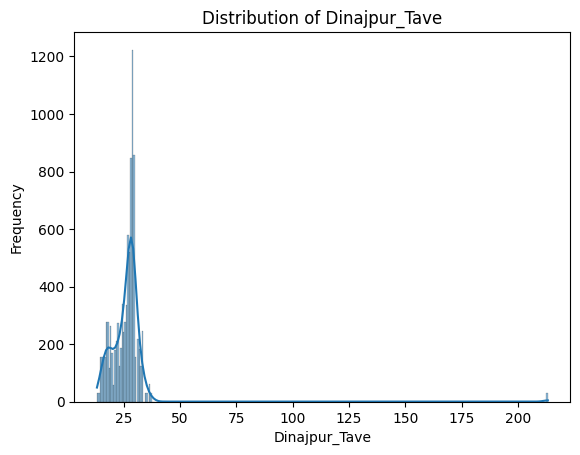

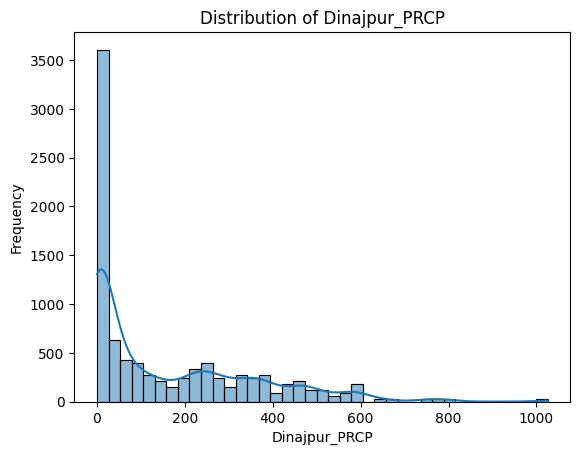

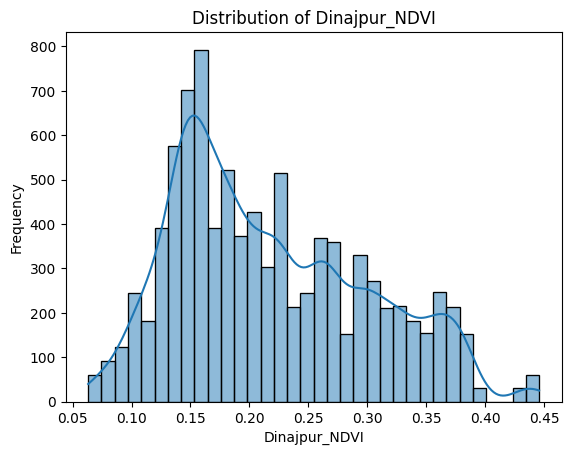

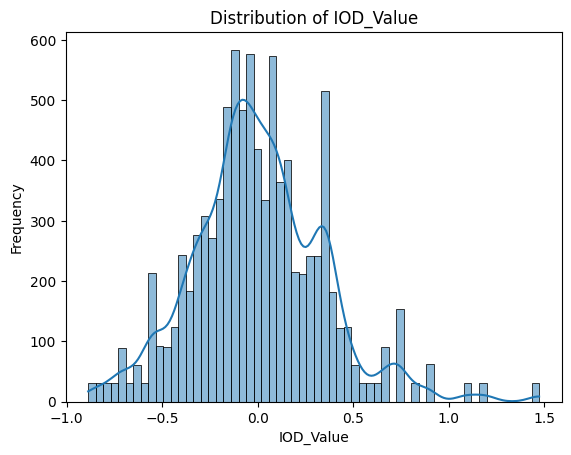

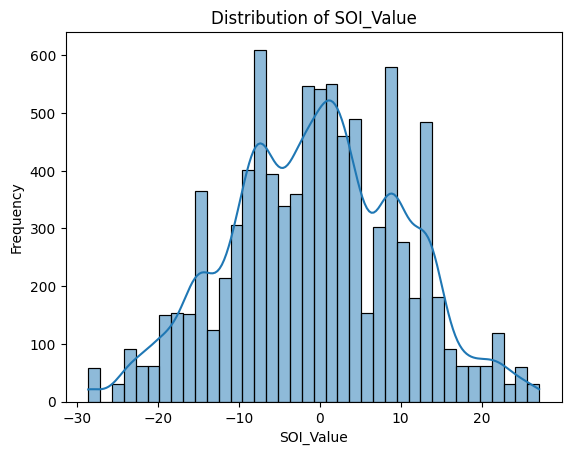

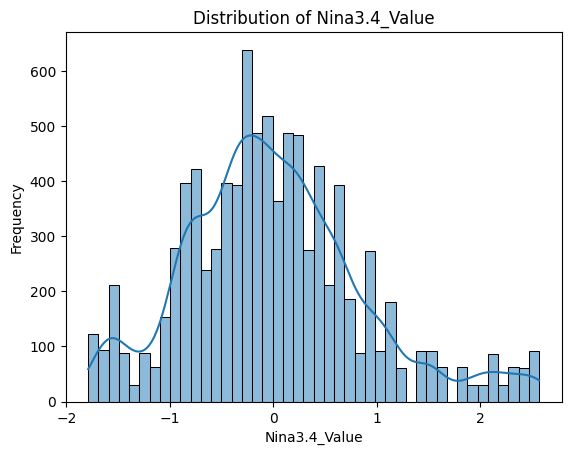

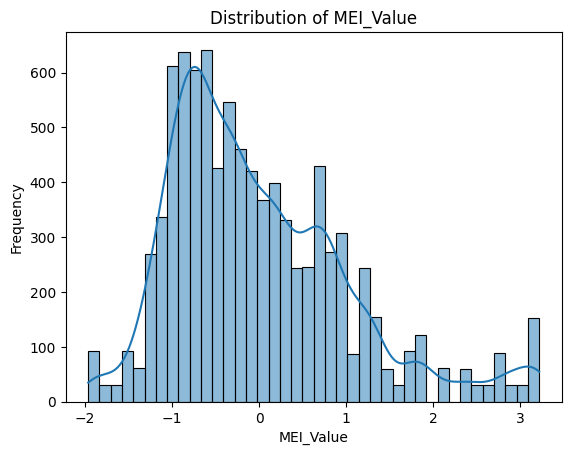

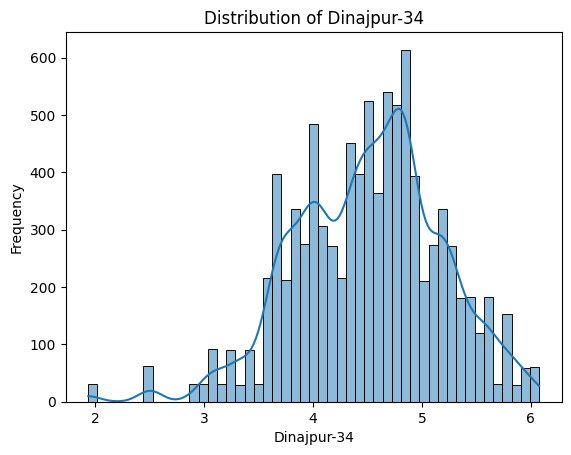

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

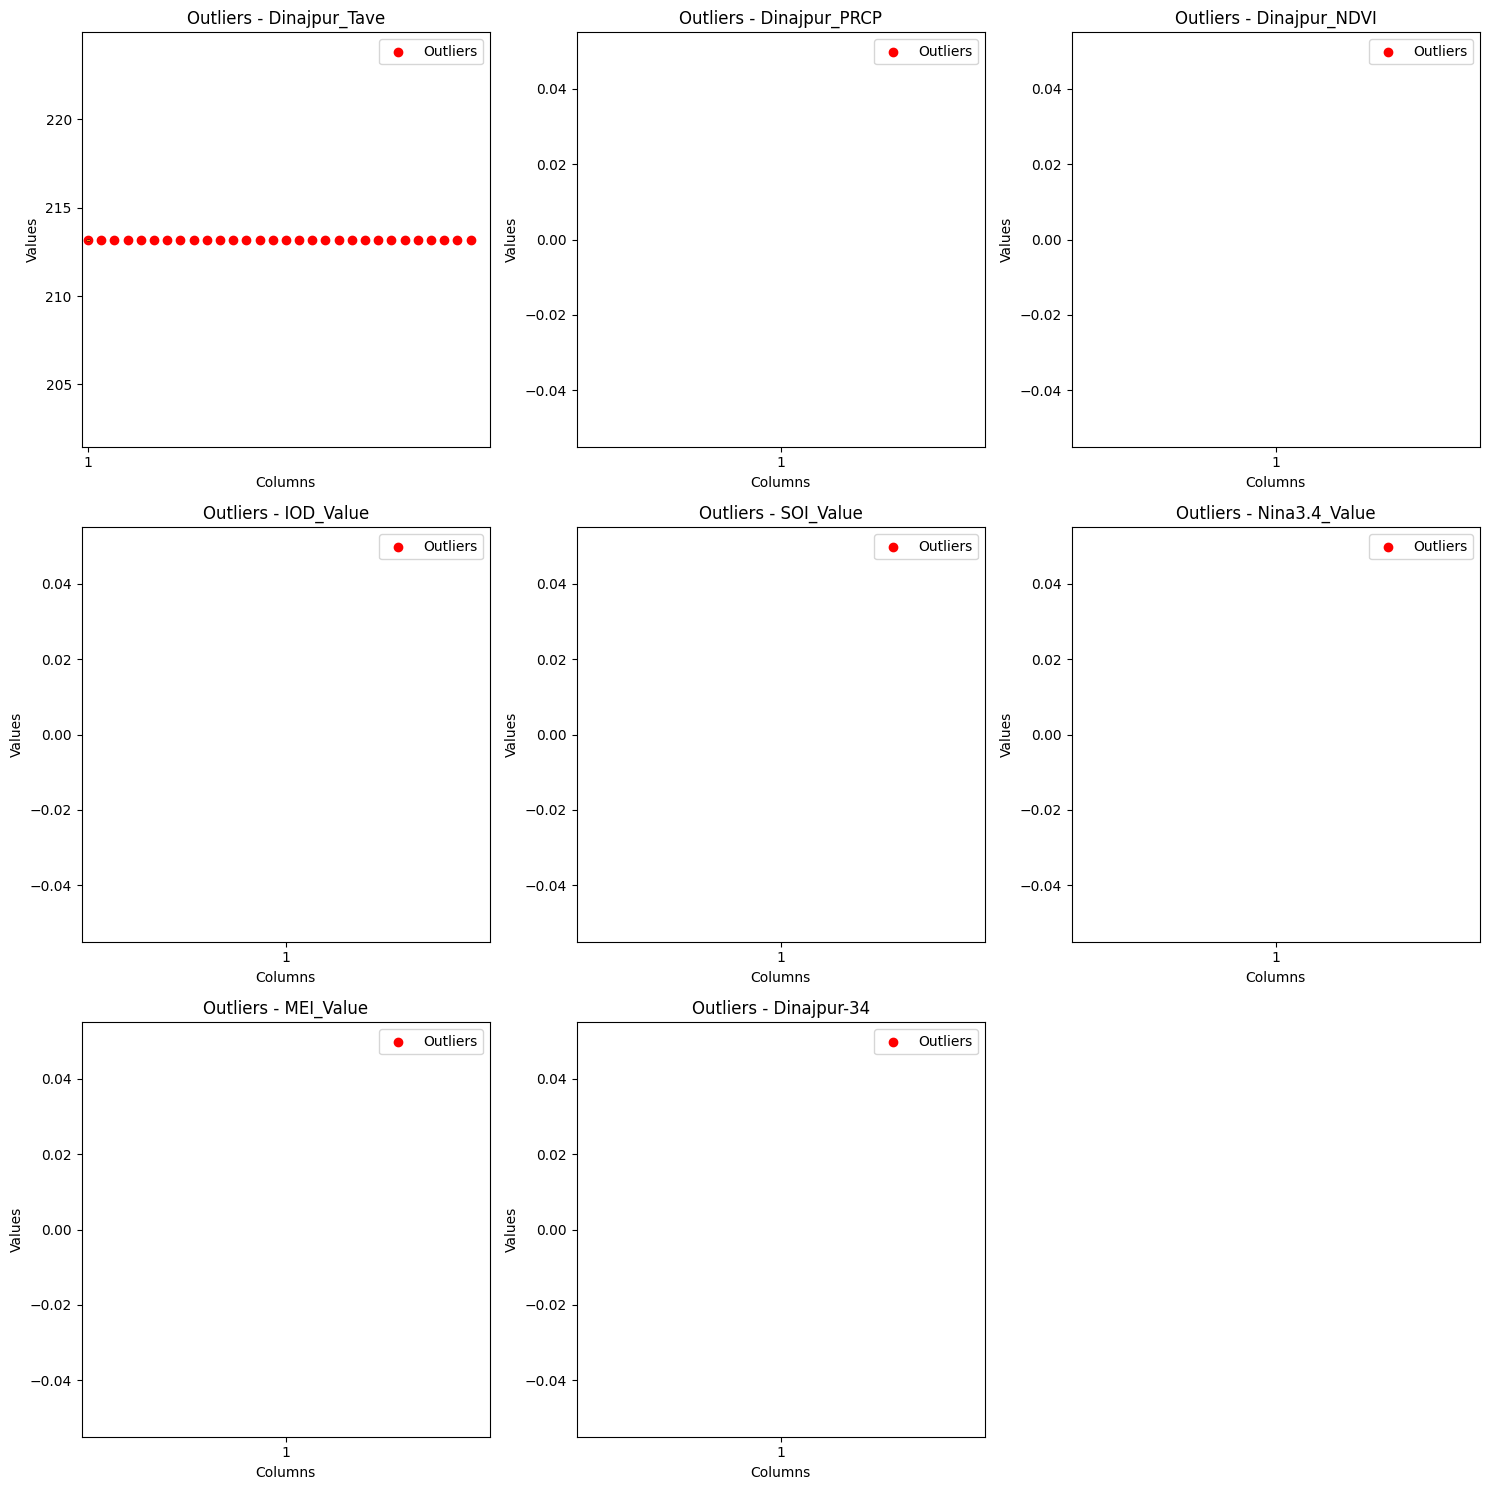

Number of total outliers: 1097


In [13]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Multicollinearity statistics

In [30]:
numeric_df = df.iloc[:, 2:-1]  
# Calculate VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1 

# Calculate VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculate Tolerance from VIF
tolerance_values = 1 / vif_values

# Display the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Dinajpur_PRCP    1.021349
Dinajpur_NDVI    1.090597
IOD_Value        1.194382
SOI_Value        2.160887
Nina3.4_Value    2.619188
MEI_Value        1.544756
Intercept        9.464926
dtype: float64

Tolerance Values:
Dinajpur_PRCP    0.979097
Dinajpur_NDVI    0.916929
IOD_Value        0.837253
SOI_Value        0.462773
Nina3.4_Value    0.381798
MEI_Value        0.647351
Intercept        0.105653
dtype: float64


# 3.  Machine Learning Modelling

## Data Splitting

In [14]:
X = df.drop(columns=['GWL(Dinajpur-34)', 'Date'])
y = df['GWL(Dinajpur-34)']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ## Visualization: Data Splitting for Machine Learning

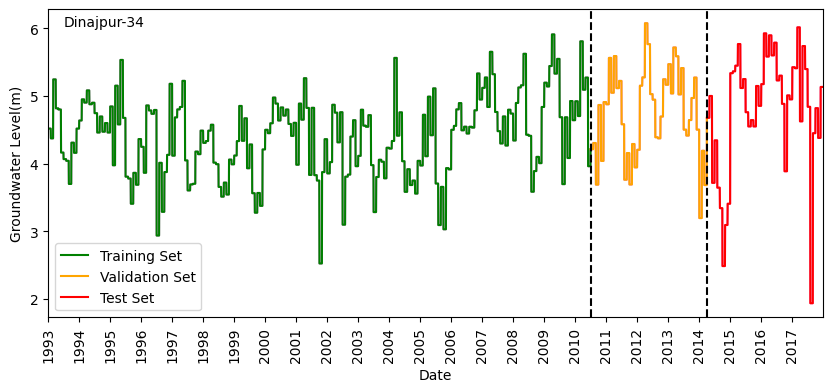

In [161]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Create a time series plot
plt.figure(figsize=(10, 4))

# Plot the entire dataset
plt.plot(df['Date'], df['GWL(Dinajpur-34)'], color='violet')

# Plot training data
plt.plot(df['Date'][:len(X_train)], df['GWL(Dinajpur-34)'][:len(X_train)], color='green', label='Training Set')

# Plot validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['GWL(Dinajpur-34)'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plot test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['GWL(Dinajpur-34)'][len(X_train) + len(X_val):], color='red', label='Test Set')

plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Groundwater Level(m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.legend()
plt.show()

In [18]:
X_train

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
3063,27.7,222.0,0.3292,-0.157832,-9.0,-0.30,-0.322
1940,26.4,148.0,0.1080,-0.131525,-24.4,0.90,2.821
6848,27.4,0.0,0.1967,0.348779,7.3,-0.93,-0.071
3509,28.9,246.0,0.1252,-0.293105,-14.6,0.70,0.636
1612,29.1,501.0,0.1765,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.7,242.0,0.1999,0.050483,13.5,-0.28,-0.318
5191,23.2,2.0,0.2692,0.147723,-1.4,-0.15,-0.864
5390,26.8,51.0,0.1459,0.130834,5.4,-1.40,-0.669
860,30.3,54.0,0.2495,-0.039353,-9.0,0.03,0.940


In [20]:
y_train

3063    4.823333
1940    4.575000
6848    3.692000
3509    3.807500
1612    4.048000
          ...   
5734    3.890000
5191    4.837500
5390    4.267500
860     5.532500
7270    5.246667
Name: Dinajpur-34, Length: 6391, dtype: float64

In [19]:
X_temp

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4043,14.8,7.0,0.1418,-0.116838,-11.6,0.26,0.526
3573,26.4,56.0,0.3521,0.626101,-7.4,1.16,1.090
4505,27.1,255.0,0.1897,0.196267,-14.5,0.30,0.588
5381,28.3,234.0,0.1418,0.380060,1.4,-1.04,-0.800
2881,22.6,0.0,0.1011,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,15.5,21.0,0.2406,-0.058970,4.1,-0.43,-0.453
812,23.8,10.0,0.2367,0.107568,3.5,0.49,0.935
1882,19.6,17.0,0.1146,0.134668,-19.2,2.08,2.823
4974,29.5,126.0,0.1101,0.164956,-15.9,0.37,-0.474


In [21]:
y_temp

4043    4.2225
3573    4.4000
4505    4.4200
5381    4.6975
2881    4.4100
         ...  
1489    4.1180
812     5.1520
1882    4.3340
4974    4.5450
4039    4.2225
Name: Dinajpur-34, Length: 2740, dtype: float64

In [22]:
X_val

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
7609,21.4,0.0,0.1407,-0.067228,9.2,-0.02,-0.911
4084,25.2,12.0,0.1778,-0.109683,0.2,-0.10,0.118
7920,32.1,424.0,0.1272,-0.465427,-7.6,0.37,-0.523
8327,31.4,0.0,0.3561,0.403764,-20.2,2.21,-0.228
2716,28.9,399.0,0.1538,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.3,45.0,0.3646,0.102282,13.4,-0.30,-0.012
3254,213.2,53.0,0.1593,-0.082291,7.2,-0.28,-0.290
4541,29.3,474.0,0.1731,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1413,-0.157270,1.6,0.19,0.784


In [23]:
X_test

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4710,21.7,0.0,0.1467,-0.361621,-2.0,-0.44,-0.998
131,26.8,308.0,0.1435,0.312997,-8.2,0.93,1.860
2802,27.9,196.0,0.1075,0.012307,9.9,-0.39,-0.113
4472,24.4,37.0,0.1239,-0.561639,0.2,0.28,0.631
1108,16.5,16.0,0.2660,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.5,0.0,0.2584,0.152971,8.4,-0.88,-0.706
6394,29.6,356.0,0.3326,-0.197084,20.5,-0.89,-1.964
1746,25.5,3.0,0.1809,1.088737,-17.8,2.29,3.214
5820,19.1,0.0,0.4334,-0.102193,13.3,-0.90,-0.540


In [24]:
y_val

7609    5.2720
4084    5.5625
7920    3.3425
8327    4.5500
2716    4.6375
         ...  
5762    4.1000
3254    3.8750
4541    5.1125
350     4.5180
2164    3.9900
Name: Dinajpur-34, Length: 1370, dtype: float64

In [25]:
y_test

4710    3.934000
131     4.800000
2802    4.800000
4472    4.110000
1108    4.248333
          ...   
2948    3.984000
6394    4.213333
1746    4.178333
5820    4.837500
6160    4.925000
Name: Dinajpur-34, Length: 1370, dtype: float64

### Data Split Validation


In [26]:
# Get the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Check if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


## Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set Descriptive Statistics
train_stats = X_train.describe()
print("Descriptive Statistics: Training Set ")
train_stats.T

Training Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD_Value,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI_Value,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4_Value,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI_Value,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set Descriptive Statistics
val_stats = X_val.describe()
print("\nDescriptive Statistics: Validation Set ")
val_stats.T


Validation Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.709197,7.157877,13.20000,22.125000,27.00000,29.000000,213.200000
Dinajpur_PRCP,1370.0,153.270803,184.765685,0.00000,3.000000,64.00000,273.000000,1026.000000
Dinajpur_NDVI,1370.0,0.217190,0.080513,0.06320,0.153275,0.19960,0.274000,0.445800
IOD_Value,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI_Value,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4_Value,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI_Value,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Testing Set Descriptive Statistics
test_stats = X_test.describe()
print("\nDescriptive Statistics: Testing Set ")
test_stats.T


Testing Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.917664,10.118151,13.20000,22.100000,27.300000,28.900000,213.200000
Dinajpur_PRCP,1370.0,156.685401,191.600047,0.00000,1.000000,55.000000,281.000000,1026.000000
Dinajpur_NDVI,1370.0,0.214213,0.080795,0.06320,0.148500,0.199600,0.267800,0.445800
IOD_Value,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI_Value,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4_Value,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI_Value,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


# Normalization of the features

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

X_val = pd.DataFrame(
    scaler.transform(X_val),
    columns = X_val.columns
)

In [13]:
X_train.head(2)

,Fature_1_Target_1,Fature_2_Target_1,Fature_3_Target_1,Common_Feature_1,Common_Feature_2,Common_Feature_3,Common_Feature_4
0,0.09032,0.286272,1.339238,-0.466604,-0.802092,-0.352135,-0.300534
1,-0.01020,-0.091869,-1.331796,-0.389732,-2.245590,1.033736,2.729244


In [14]:
X_test.head(2)

,Fature_1_Target_1,Fature_2_Target_1,Fature_3_Target_1,Common_Feature_1,Common_Feature_2,Common_Feature_3,Common_Feature_4
0,-0.373620,-0.848151,-0.864486,-1.062112,-0.145957,-0.513820,-0.952183
1,0.020729,0.725733,-0.903126,0.909241,-0.727105,1.068383,1.802862


In [ ]:
X_val.head(2)

,Fature_1_Target_1,Fature_2_Target_1,Fature_3_Target_1,Common_Feature_1,Common_Feature_2,Common_Feature_3,Common_Feature_4
0,-0.396817,-0.848151,-0.936937,-0.201844,0.903860,-0.028765,-0.868317
1,-0.102988,-0.786831,-0.488947,-0.325903,0.060257,-0.121156,0.123615


## Modeling

In [32]:
# Base models

models_predictions_val = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'SVM': SVR(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_rrse = np.sqrt(np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculate metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_rrse = np.sqrt(np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculate metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_rrse = np.sqrt(np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train RRSE': train_rrse,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation RRSE': val_rrse,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test RRSE': test_rrse,
        'Test CC': test_cc
    }

# Print the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 4.504602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 4.504602
Metrics for Linear Regression:
Train RMSE: 0.6042416144613502
Train MAE: 0.4778873613073856
Train R-squared: 0.2035154026885203
Train RAE: 0.11236028210135689
Train RRSE: 0.8924598575350489
Train CC: 0.45112681441975955
Validation RMSE: 0.6181272788197235
Validation MAE: 0.49419017777367646
Validation R-squared: 0.1596

# 4. Hyper parameter tuning

## 1. Random Forest Regressor HPT

In [3]:
# Initialize Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on training set using Random Forest
rf_pred_train = best_rf.predict(X_train)

# Calculate metrics for Random Forest on training set
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)
rf_rae_train = mean_absolute_percentage_error(y_train, rf_pred_train)
rf_rrse_train = np.sqrt(np.sum((y_train - rf_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
rf_cc_train = np.corrcoef(y_train, rf_pred_train)[0, 1]

# Predict on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculate metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_rrse_val = np.sqrt(np.sum((y_val - rf_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Predict on test set using Random Forest
rf_pred_test = best_rf.predict(X_test)

# Calculate metrics for Random Forest on test set
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_rae_test = mean_absolute_percentage_error(y_test, rf_pred_test)
rf_rrse_test = np.sqrt(np.sum((y_test - rf_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
rf_cc_test = np.corrcoef(y_test, rf_pred_test)[0, 1]

# Print metrics for training set
print("Random Forest RMSE (Train):", rf_rmse_train)
print("Random Forest MAE (Train):", rf_mae_train)
print("Random Forest R-squared (Train):", rf_r2_train)
print("Random Forest RAE (Train):", rf_rae_train)
print("Random Forest RRSE (Train):", rf_rrse_train)
print("Random Forest CC (Train):", rf_cc_train)

print()

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest RRSE (Validation):", rf_rrse_val)
print("Random Forest CC (Validation):", rf_cc_val)

print()

print("Random Forest RMSE (Test):", rf_rmse_test)
print("Random Forest MAE (Test):", rf_mae_test)
print("Random Forest R-squared (Test):", rf_r2_test)
print("Random Forest RAE (Test):", rf_rae_test)
print("Random Forest RRSE (Test):", rf_rrse_test)
print("Random Forest CC (Test):", rf_cc_test)

NameError: name 'X_train' is not defined

## 2. LWLR HPT

In [34]:
# the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'] 
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Get the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predict on training set using LWLR
lwlr_pred_train = best_lwlr.predict(X_train)

# Calculate metrics for LWLR on training set
lwlr_rmse_train = np.sqrt(mean_squared_error(y_train, lwlr_pred_train))
lwlr_mae_train = mean_absolute_error(y_train, lwlr_pred_train)
lwlr_r2_train = r2_score(y_train, lwlr_pred_train)
lwlr_rae_train = mean_absolute_percentage_error(y_train, lwlr_pred_train)
lwlr_rrse_train = np.sqrt(np.sum((y_train - lwlr_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
lwlr_cc_train = np.corrcoef(y_train, lwlr_pred_train)[0, 1]

# Predict on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculate metrics for LWLR on validation set
lwlr_rmse_val = np.sqrt(mean_squared_error(y_val, lwlr_pred_val))
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)
lwlr_rae_val = mean_absolute_percentage_error(y_val, lwlr_pred_val)
lwlr_rrse_val = np.sqrt(np.sum((y_val - lwlr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lwlr_cc_val = np.corrcoef(y_val, lwlr_pred_val)[0, 1]

# Predict on test set using LWLR
lwlr_pred_test = best_lwlr.predict(X_test)

# Calculate metrics for LWLR on test set
lwlr_rmse_test = np.sqrt(mean_squared_error(y_test, lwlr_pred_test))
lwlr_mae_test = mean_absolute_error(y_test, lwlr_pred_test)
lwlr_r2_test = r2_score(y_test, lwlr_pred_test)
lwlr_rae_test = mean_absolute_percentage_error(y_test, lwlr_pred_test)
lwlr_rrse_test = np.sqrt(np.sum((y_test - lwlr_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
lwlr_cc_test = np.corrcoef(y_test, lwlr_pred_test)[0, 1]

# Print metrics for training set
print("LWLR RMSE (Train):", lwlr_rmse_train)
print("LWLR MAE (Train):", lwlr_mae_train)
print("LWLR R-squared (Train):", lwlr_r2_train)
print("LWLR RAE (Train):", lwlr_rae_train)
print("LWLR RRSE (Train):", lwlr_rrse_train)
print("LWLR CC (Train):", lwlr_cc_train)

print()

# Print the best hyperparameters and evaluation metrics for LWLR on validation set
print("Best Hyperparameters for LWLR:", best_params_lwlr)
print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)
print("LWLR RAE (Validation):", lwlr_rae_val)
print("LWLR RRSE (Validation):", lwlr_rrse_val)
print("LWLR CC (Validation):", lwlr_cc_val)

print()

# Print metrics for test set
print("LWLR RMSE (Test):", lwlr_rmse_test)
print("LWLR MAE (Test):", lwlr_mae_test)
print("LWLR R-squared (Test):", lwlr_r2_test)
print("LWLR RAE (Test):", lwlr_rae_test)
print("LWLR RRSE (Test):", lwlr_rrse_test)
print("LWLR CC (Test):", lwlr_cc_test)


Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}
LWLR RMSE (Validation): 1.1382330514343598e-16
LWLR MAE (Validation): 2.917374371277784e-17
LWLR R-squared (Validation): 1.0
LWLR RAE (Validation): 7.714109001275127e-18
LWLR RRSE (Validation): 1.6880425127408365e-16
LWLR CC (Validation): 0.9999999999999999


## 3. Gaussian Process Regression HPT

In [35]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initialize Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predict on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculate metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_rrse_val = np.sqrt(np.sum((y_val - gpr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gaussian Process Regression on validation set
print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process RRSE (Validation):", gpr_rrse_val)
print("Gaussian Process CC (Validation):", gpr_cc_val)   

D:\Jupyter\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best Hyperparameters for Gaussian Process Regression: {'kernel': None}
Gaussian Process RMSE (Validation): 2.2091747796069696e-11
Gaussian Process MAE (Validation): 2.1328387879832977e-11
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 4.721107894094502e-12
Gaussian Process RRSE (Validation): 3.2762894570246884e-11
Gaussian Process CC (Validation): 1.0


## 4. Weighted K-Nearest Neighbors HPT

In [36]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initialize Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Get the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predict on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculate metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)
wknn_rrse_val = np.sqrt(np.sum((y_val - wknn_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Weighted K-Nearest Neighbors on validation set
print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN RRSE (Validation):", wknn_rrse_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Weighted K-NN RMSE (Validation): 1.1382330514343598e-16
Weighted K-NN MAE (Validation): 2.917374371277784e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 7.714109001275127e-18
Weighted K-NN RRSE (Validation): 1.6880425127408365e-16
Weighted K-NN CC (Validation): 0.9999999999999999


## 5. K-Nearest Neighbors HPT

In [37]:
# the range of neighbors and weights to consider
param_grid = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],  
    'metric': ['euclidean', 'manhattan'] 
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predict on validation set
knn_pred = best_knn.predict(X_val)

# Calculate metrics for KNN
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_pred))
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)
knn_rae = mean_absolute_percentage_error(y_val, knn_pred)
knn_rrse = np.sqrt(np.sum((y_val - knn_pred)**2) / np.sum((y_val - np.mean(y_val))**2))
knn_cc = np.corrcoef(y_val, knn_pred)[0, 1]

# Print the best hyperparameters and evaluation metrics for KNN
print("Best Hyperparameters for KNN:", best_params)
print("KNN RMSE:", knn_rmse)
print("KNN MAE:", knn_mae)
print("KNN R-squared:", knn_r2)
print("KNN RAE:", knn_rae)
print("KNN RRSE:", knn_rrse)
print("KNN CC:", knn_cc)

Best Hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
KNN RMSE: 1.1382330514343598e-16
KNN MAE: 2.917374371277784e-17
KNN R-squared: 1.0
KNN RAE: 7.714109001275127e-18
KNN RRSE: 1.6880425127408365e-16
KNN CC: 0.9999999999999999


## 6. XGBoost Regressor HPT

In [38]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predict on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculate metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_rrse_val = np.sqrt(np.sum((y_val - xgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for XGBoost Regressor on validation set
print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost RRSE (Validation):", xgb_rrse_val)
print("XGBoost CC (Validation):", xgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])
XGBoost RMSE (Validation): 0.02774949482781719
XGBoost MAE (Validation): 0.021338228175786747
XGBoost R-squared (Validation): 0.99830638559844
XGBoost RAE (Validation): 0.00486477178342949
XGBoost RRSE (Validation): 0.04115354664618848
XGBoost CC (Validation): 0.999396013716


## 7. CatBoost Regressor  HPT

In [39]:

# Define the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Get the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predict on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculate metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_rrse_val = np.sqrt(np.sum((y_val - catboost_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for CatBoost Regressor on validation set
print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost RRSE (Validation):", catboost_rrse_val)
print("CatBoost CC (Validation):", catboost_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])
CatBoost RMSE (Validation): 0.00042912899318830463
CatBoost MAE (Validation): 0.00033133373611647133
CatBoost R-squared (Validation): 0.9999995949766226
CatBoost RAE (Validation): 7.538938554222685e-05
CatBoost RRSE (Validation): 0.0006364144698123848
CatBoost CC (Validation): 0.9999998353206883


## 8. LightGBM Regressor HPT

In [40]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Perform Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Get the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predict on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculate metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_rrse_val = np.sqrt(np.sum((y_val - lgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for LightGBM Regressor on validation set
print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)
print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM RRSE (Validation):", lgb_rrse_val)
print("LightGBM CC (Validation):", lgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Validation): 0.004432867507095804
LightGBM MAE (Validation): 0.0032768490793525108
LightGBM R-squared (Validation): 0.9999567810832577
LightGBM RAE (Validation): 0.0007460960726465208
LightGBM RRSE (Validation): 0.006574109577907239
LightGBM CC (Validation): 0.9999818942869207


## 9. Gradient Boosting Regressor HPT

In [41]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predict on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculate metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_rrse_val = np.sqrt(np.sum((y_val - gbr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gradient Boosting Regressor on validation set
print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting RRSE (Validation):", gbr_rrse_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
Gradient Boosting RMSE (Validation): 0.0037872054527362396
Gradient Boosting MAE (Validation): 0.0029452666459291433
Gradient Boosting R-squared (Validation): 0.999968454159209
Gradient Boosting RAE (Validation): 0.0006720686703357055
Gradient Boosting RRSE (Validation): 0.005616568417730007
Gradient Boosting CC (Validation): 0.999987521647786


## 10.Ridge Regression HPT

In [42]:
# Define the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initialize Ridge model
ridge = Ridge(max_iter=10000)

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predict on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_rrse_val = np.sqrt(np.sum((y_val - ridge_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression RRSE (Validation):", ridge_rrse_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

Best Hyperparameters for Ridge Regression: {'alpha': 1, 'solver': 'auto'}
Ridge Regression RMSE (Validation): 0.6181463712185784
Ridge Regression MAE (Validation): 0.49415735431345875
Ridge Regression R-squared (Validation): 0.15959810389153317
Ridge Regression RAE (Validation): 0.11641831434867354
Ridge Regression RRSE (Validation): 0.9167343650744565
Ridge Regression CC (Validation): 0.40175071786259536


# 7. Hybrid models

## Hybrid modeling

## Hybrid model 1: Validation

In [43]:
hybrid1_pred_val = (rf_pred_val + lwlr_pred_val) / 2

# Evaluate the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_rrse_val = np.sqrt(np.sum((y_val - hybrid1_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation):", hybrid1_rrse_val)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation): 1.5256852497424586e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Validation): 1.2849413341939038e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Validation): 2.84660218897471e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation): 2.262648725040481e-15
Hybrid Model 1 (Random Forest + LWLR) CC (Validation): 0.9999999999999997


## Hybrid model 1: Test

In [44]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)


hybrid1_pred_test = (rf_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model on test set
hybrid1_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid1_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid1_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid1_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid1_rrse_test = np.sqrt(np.sum((y_test - hybrid1_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid1_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 1
print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Test):", hybrid1_rmse_test)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Test):", hybrid1_mae_test)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Test):", hybrid1_r2_test)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Test):", hybrid1_rae_test)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Test):", hybrid1_rrse_test)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Test):", hybrid1_cc_test)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Test): 1.5717419084357242e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Test): 1.326757033515552e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Test): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Test): 2.923536079642081e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Test): 2.4472173172227774e-15
Hybrid Model 1 (Random Forest + LWLR) CC (Test): 1.0


## Hybrid model 2: Validation

In [45]:
# Calculate predictions for Hybrid Model 2 (GBR + CatBoost) on validation set
hybrid2_pred_val = (best_lgb.predict(X_val) + best_catboost.predict(X_val)) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_rrse_val = np.sqrt(np.sum((y_val - np.mean(y_val))**2) / np.sum((y_val - hybrid2_pred_val)**2))
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 2
print("Hybrid Model 2 (GBR + CatBoost) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Validation):", hybrid2_rrse_val)
print("Hybrid Model 2 (GBR + CatBoost) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (GBR + CatBoost) RMSE (Validation): 0.002367843581060388
Hybrid Model 2 (GBR + CatBoost) MAE (Validation): 0.001752729324337948
Hybrid Model 2 (GBR + CatBoost) R-squared (Validation): 0.9999876686565243
Hybrid Model 2 (GBR + CatBoost) RAE (Validation): 0.00039925331266362407
Hybrid Model 2 (GBR + CatBoost) RRSE (Validation): 284.7703720518716
Hybrid Model 2 (GBR + CatBoost) CC (Validation): 0.9999949135345706


## Hybrid model 2: Test

In [46]:
# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_lgb.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)


hybrid2_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluate the performance of Hybrid Model 2 on the test set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_rrse_test = np.sqrt(np.sum((y_test - hybrid2_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

print("Hybrid Model 2 (GBR + CatBoost) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Test):", hybrid2_rrse_test)
print("Hybrid Model 2 (GBR + CatBoost) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (GBR + CatBoost) RMSE (Test): 0.0024028913039733806
Hybrid Model 2 (GBR + CatBoost) MAE (Test): 0.0017530844638377302
Hybrid Model 2 (GBR + CatBoost) R-squared (Test): 0.9999860024876495
Hybrid Model 2 (GBR + CatBoost) RAE (Test): 0.00039671311926673547
Hybrid Model 2 (GBR + CatBoost) RRSE (Test): 0.003741324945862226
Hybrid Model 2 (GBR + CatBoost) CC (Test): 0.9999941999851061


## Hybrid model 3: Validation

In [47]:
hybrid3_pred_val = (ridge_pred_val + lwlr_pred_val) / 2

# Calculate metrics for the hybrid model on validation set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_rrse_val = np.sqrt(np.sum((y_val - hybrid3_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

print("Hybrid Model 3 (Ridge + LWLR) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Validation):", hybrid3_rrse_val)
print("Hybrid Model 3 (Ridge + LWLR) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (Ridge + LWLR) RMSE (Validation): 0.3090731856092892
Hybrid Model 3 (Ridge + LWLR) MAE (Validation): 0.24707867715672938
Hybrid Model 3 (Ridge + LWLR) R-squared (Validation): 0.7898995259728833
Hybrid Model 3 (Ridge + LWLR) RAE (Validation): 0.058209157174336786
Hybrid Model 3 (Ridge + LWLR) RRSE (Validation): 0.45836718253722825
Hybrid Model 3 (Ridge + LWLR) CC (Validation): 0.9482604686056284


## Hybrid model 3: Test

In [48]:
# Predict on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

hybrid3_pred_test = (ridge_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model 3 on test set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_rrse_test = np.sqrt(np.sum((y_test - hybrid3_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 3
print("Hybrid Model 3 (Ridge + LWLR) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Test):", hybrid3_rrse_test)
print("Hybrid Model 3 (Ridge + LWLR) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (Ridge + LWLR) RMSE (Test): 0.29218978282910496
Hybrid Model 3 (Ridge + LWLR) MAE (Test): 0.23304276671356872
Hybrid Model 3 (Ridge + LWLR) R-squared (Test): 0.7930274934676711
Hybrid Model 3 (Ridge + LWLR) RAE (Test): 0.05330571794005376
Hybrid Model 3 (Ridge + LWLR) RRSE (Test): 0.4549423112135525
Hybrid Model 3 (Ridge + LWLR) CC (Test): 0.9428068657344795


## Hybrid model 4: Validation

In [49]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combine predictions
hybrid4_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_rrse_val = np.sqrt(np.sum((y_val - hybrid4_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation):", hybrid4_rrse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation): 0.0014207061486362859
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation): 0.0010516375946028266
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation): 0.9999955607163488
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation): 0.00023955198759818537
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation): 0.0021069607616719726
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation): 0.9999981710302477


## Hybrid model 4: Test

In [50]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3


rf_pred_test = best_rf.predict(X_test)  
lgb_pred_test = best_lgb.predict(X_test) 
catboost_pred_test = best_catboost.predict(X_test)

# Combine predictions for the test set
hybrid4_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test)

# Evaluate the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_rrse_test = np.sqrt(np.sum((y_test - hybrid4_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test):", hybrid4_rrse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test): 0.0014417347823840368
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test): 0.0010518506783026732
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test): 0.9999949608955538
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test): 0.0002380278715600473
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test): 0.002244794967517349
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test): 0.9999979145900819


## Hybrid model 5: Validation

In [51]:
hybrid5_pred_val = (rf_pred_val + gpr_pred_val + lgb_pred_val) / 3

# Calculate metrics for the hybrid model 5 on validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_rrse_val = np.sqrt(np.sum((y_val - hybrid5_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE:", hybrid5_rmse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE:", hybrid5_mae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared:", hybrid5_r2_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE:", hybrid5_rae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE:", hybrid5_rrse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC:", hybrid5_cc_val)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE: 0.0014776225029260296
Hybrid Model 5 (RF + GPR + LightGBM) MAE: 0.0010922830267598791
Hybrid Model 5 (RF + GPR + LightGBM) R-squared: 0.9999951978981361
Hybrid Model 5 (RF + GPR + LightGBM) RAE: 0.0002486986908545738
Hybrid Model 5 (RF + GPR + LightGBM) RRSE: 0.0021913698601340437
Hybrid Model 5 (RF + GPR + LightGBM) CC: 0.999997995398832


## Hybrid model 5: Test

In [52]:
gpr_pred_test = best_gpr.predict(X_test)

hybrid5_pred_test = (rf_pred_test + gpr_pred_test + lgb_pred_test) / 3

# Calculate metrics for the hybrid model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_rrse_test = np.sqrt(np.sum((y_test - hybrid5_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test):", hybrid5_rrse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC (Test):", hybrid5_cc_test)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test): 0.0015065498729127007
Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test): 0.001095043992322461
Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test): 0.9999944976319812
Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test): 0.00024772131216230236
Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test): 0.002345712688873377
Hybrid Model 5 (RF + GPR + LightGBM) CC (Test): 0.9999976890248136


## Hybrid model 6: Validation

In [53]:
hybrid6_pred_val = (knn_pred + xgb_pred_val + catboost_pred_val) / 3

# Calculate metrics for the hybrid model 6 on validation set
hybrid6_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid6_pred_val))
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = mean_absolute_percentage_error(y_val, hybrid6_pred_val)
hybrid6_rrse_val = np.sqrt(np.sum((y_val - hybrid6_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation):", hybrid6_rrse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation): 0.009358503857966372
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation): 0.007195893561207285
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation): 0.9998073729725393
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation): 0.001640477989275888
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation): 0.013879013922490538
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation): 0.9999333717320126


## Hybrid model 6: Test

In [54]:
best_knn_pred_test = best_knn.predict(X_test)
best_xgb_pred_test = best_xgb.predict(X_test)
best_catboost_pred_test = best_catboost.predict(X_test)

hybrid6_pred_test = (best_knn_pred_test + best_xgb_pred_test + best_catboost_pred_test) / 3

# Calculate metrics for the hybrid model 6 on test set
hybrid6_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid6_pred_test))
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = mean_absolute_percentage_error(y_test, hybrid6_pred_test)
hybrid6_rrse_test = np.sqrt(np.sum((y_test - hybrid6_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test):", hybrid6_rrse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test): 0.009039527577772623
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test): 0.006989908736756422
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test): 0.9998019047435992
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test): 0.001575574282612097
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test): 0.01407463166128505
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test): 0.9999331374838468


## Hybrid model 7: Validation

In [55]:
hybrid7_pred_val = (rf_pred_val + lwlr_pred_val + gpr_pred_val + wknn_pred_val) / 4

# Calculate metrics for the hybrid model 7 on validation set
hybrid7_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid7_pred_val))
hybrid7_mae_val = mean_absolute_error(y_val, hybrid7_pred_val)
hybrid7_r2_val = r2_score(y_val, hybrid7_pred_val)
hybrid7_rae_val = mean_absolute_percentage_error(y_val, hybrid7_pred_val)
hybrid7_rrse_val = np.sqrt(np.sum((y_val - hybrid7_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid7_cc_val = np.corrcoef(y_val, hybrid7_pred_val)[0, 1]

print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation):", hybrid7_rmse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation):", hybrid7_mae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation):", hybrid7_r2_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation):", hybrid7_rae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation):", hybrid7_rrse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation):", hybrid7_cc_val)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation): 5.522976064300304e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation): 5.332126305778311e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation): 1.1802850412967424e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation): 8.190781652000399e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation): 0.9999999999999999


## Hybrid model 7: Test

In [56]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Predict on the test set using Gaussian Process Regressor
gpr_pred_test = best_gpr.predict(X_test)

# Predict on the test set using Weighted k-Nearest Neighbors Regressor
wknn_pred_test = best_wknn.predict(X_test)

hybrid7_pred_test = (rf_pred_test + lwlr_pred_test + gpr_pred_test + wknn_pred_test) / 4

# Calculate metrics for the hybrid model 7 on test set
hybrid7_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid7_pred_test))
hybrid7_mae_test = mean_absolute_error(y_test, hybrid7_pred_test)
hybrid7_r2_test = r2_score(y_test, hybrid7_pred_test)
hybrid7_rae_test = mean_absolute_percentage_error(y_test, hybrid7_pred_test)
hybrid7_rrse_test = np.sqrt(np.sum((y_test - hybrid7_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid7_cc_test = np.corrcoef(y_test, hybrid7_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 7
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test):", hybrid7_rmse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test):", hybrid7_mae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test):", hybrid7_r2_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test):", hybrid7_rae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test):", hybrid7_rrse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test):", hybrid7_cc_test)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test): 5.576102446410538e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test): 5.400406480479944e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test): 1.1870435031025204e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test): 8.682045313053512e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test): 1.0


## Hybrid model 8: Validation

In [57]:
hybrid8_pred_val = (xgb_pred_val + catboost_pred_val + lgb_pred_val + ridge_pred_val) / 4

# Calculate metrics for the hybrid model on validation set
hybrid8_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid8_pred_val))
hybrid8_mae_val = mean_absolute_error(y_val, hybrid8_pred_val)
hybrid8_r2_val = r2_score(y_val, hybrid8_pred_val)
hybrid8_rae_val = mean_absolute_percentage_error(y_val, hybrid8_pred_val)
hybrid8_rrse_val = np.sqrt(np.sum((y_val - hybrid8_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid8_cc_val = np.corrcoef(y_val, hybrid8_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 8
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation):", hybrid8_rmse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation):", hybrid8_mae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation):", hybrid8_r2_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation):", hybrid8_rae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation):", hybrid8_rrse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation):", hybrid8_cc_val)

Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation): 0.15947315526840694
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation): 0.12812371489660426
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation): 0.9440655271378775
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation): 0.030159446915340317
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation): 0.23650469945039673
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation): 0.9917880038901179


## Hybrid model 8: Test

In [58]:
# Predict on the test set using the hybrid model
hybrid8_pred_test = (best_xgb.predict(X_test) + best_catboost.predict(X_test) + best_lgb.predict(X_test) + best_ridge.predict(X_test)) / 4

# Calculate metrics for the hybrid model 8 on the test set
hybrid8_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid8_pred_test))
hybrid8_mae_test = mean_absolute_error(y_test, hybrid8_pred_test)
hybrid8_r2_test = r2_score(y_test, hybrid8_pred_test)
hybrid8_rae_test = mean_absolute_percentage_error(y_test, hybrid8_pred_test)
hybrid8_rrse_test = np.sqrt(np.sum((y_test - hybrid8_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid8_cc_test = np.corrcoef(y_test, hybrid8_pred_test)[0, 1]

# Print evaluation metrics for the hybrid model 8 on the test set
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid8_rmse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid8_mae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid8_r2_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test):", hybrid8_rae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test):", hybrid8_rrse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test):", hybrid8_cc_test)

Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.15095604070047083
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.12096098785530715
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.9447561927823853
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test): 0.0276606533918663
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test): 0.23504001195033733
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test): 0.9906806436307354


## Hybrid model 9: Validation

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Define the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the validation set using the stacking model
hybrid9_pred_val = stacking_model.predict(X_val)

# Calculate metrics for the hybrid model 9 on the validation set
hybrid9_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid9_pred_val))
hybrid9_mae_val = mean_absolute_error(y_val, hybrid9_pred_val)
hybrid9_r2_val = r2_score(y_val, hybrid9_pred_val)
hybrid9_rae_val = mean_absolute_percentage_error(y_val, hybrid9_pred_val)
hybrid9_rrse_val = np.sqrt(np.sum((y_val - hybrid9_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid9_cc_val = np.corrcoef(y_val, hybrid9_pred_val)[0, 1]

print("Hybrid Model 9 RMSE (Validation):", hybrid9_rmse_val)
print("Hybrid Model 9 MAE (Validation):", hybrid9_mae_val)
print("Hybrid Model 9 R-squared (Validation):", hybrid9_r2_val)
print("Hybrid Model 9 RAE (Validation):", hybrid9_rae_val)
print("Hybrid Model 9 RRSE (Validation):", hybrid9_rrse_val)
print("Hybrid Model 9 CC (Validation):", hybrid9_cc_val)

Hybrid Model 9 RMSE (Validation): 0.0031801240832730455
Hybrid Model 9 MAE (Validation): 0.0015440598740844255
Hybrid Model 9 R-squared (Validation): 0.9999777570437844
Hybrid Model 9 RAE (Validation): 0.0003765407007234182
Hybrid Model 9 RRSE (Validation): 0.004716243867274008
Hybrid Model 9 CC (Validation): 0.9999889085239283


## Hybrid model 9: Test

In [60]:
# Predict on the test set using the stacking model
hybrid9_pred_test = stacking_model.predict(X_test)

# Calculate metrics for the hybrid model 9 on test set
hybrid9_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid9_pred_test))
hybrid9_mae_test = mean_absolute_error(y_test, hybrid9_pred_test)
hybrid9_r2_test = r2_score(y_test, hybrid9_pred_test)
hybrid9_rae_test = mean_absolute_percentage_error(y_test, hybrid9_pred_test)
hybrid9_rrse_test = np.sqrt(np.sum((y_test - hybrid9_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid9_cc_test = np.corrcoef(y_test, hybrid9_pred_test)[0, 1]

print("Hybrid Model 9 RMSE (Test):", hybrid9_rmse_test)
print("Hybrid Model 9 MAE (Test):", hybrid9_mae_test)
print("Hybrid Model 9 R-squared (Test):", hybrid9_r2_test)
print("Hybrid Model 9 RAE (Test):", hybrid9_rae_test)
print("Hybrid Model 9 RRSE (Test):", hybrid9_rrse_test)
print("Hybrid Model 9 CC (Test):", hybrid9_cc_test)

Hybrid Model 9 RMSE (Test): 0.003441879382807874
Hybrid Model 9 MAE (Test): 0.001570566417216049
Hybrid Model 9 R-squared (Test): 0.9999712806966038
Hybrid Model 9 RAE (Test): 0.0003783145885122795
Hybrid Model 9 RRSE (Test): 0.005359039409837007
Hybrid Model 9 CC (Test): 0.9999858422341458


## Hybrid model 10: Validation

In [61]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Create hybrid predictions
hybrid10_pred_val = (
    weight_rf * rf_pred_val +
    weight_lwlr * lwlr_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val  
)

# Calculate metrics for the hybrid model 10 on the validation set
hybrid10_rmse_val = mean_squared_error(y_val, hybrid10_pred_val, squared=False)
hybrid10_mae_val = mean_absolute_error(y_val, hybrid10_pred_val)
hybrid10_r2_val = r2_score(y_val, hybrid10_pred_val)
hybrid10_rae_val = hybrid10_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid10_rrse_val = hybrid10_rmse_val / np.sqrt(np.mean((y_val - np.mean(y_val))**2))
hybrid10_cc_val = np.corrcoef(y_val, hybrid10_pred_val)[0, 1]

# Print evaluation metrics for the hybrid model 10 on the validation set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid10_rmse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid10_mae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid10_r2_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid10_rae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation):", hybrid10_rrse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid10_cc_val)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.23300162939293728
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.22407513513545627
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.8805950608686739
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.41379812539568733
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation): 0.3455501977011822
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9997484055144222


## Hybrid model 10: Test

In [62]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05


rf_pred_test = best_rf.predict(X_test)
lwlr_pred_test = best_lwlr.predict(X_test)
gpr_pred_test = best_gpr.predict(X_test)
wknn_pred_test=best_wknn.predict(X_test)
knn_pred_test=best_knn.predict(X_test)
xgb_pred_test = best_xgb.predict(X_test)
catboost_pred_test = best_catboost.predict(X_test)
gbr_pred_test = best_gbr.predict(X_test)
lgb_pred_test = best_lgb.predict(X_test)
ridge_pred_test = best_ridge.predict(X_test)

# Create hybrid predictions
hybrid10_pred_test = (
    weight_rf * rf_pred_test +
    weight_lwlr * lwlr_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test  
)

# Calculate metrics for the hybrid model 10 on the test set

hybrid10_rmse_test = mean_squared_error(y_test, hybrid10_pred_test, squared=False)
hybrid10_mae_test = mean_absolute_error(y_test, hybrid10_pred_test)
hybrid10_r2_test = r2_score(y_test, hybrid10_pred_test)
hybrid10_rae_test = hybrid10_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid10_rrse_test = hybrid10_rmse_test / np.sqrt(np.mean((y_test - np.mean(y_test))**2))
hybrid10_cc_test = np.corrcoef(y_test, hybrid10_pred_test)[0, 1]


# Print etestuation metrics for the hybrid model 10 on the test set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid10_rmse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid10_mae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid10_r2_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid10_rae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test):", hybrid10_rrse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid10_cc_test)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.27066117910629073
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.23706652067317258
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.8224034410350336
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.46378197535934074
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test): 0.4214220674869393
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.9913753156837104


# 5. Visualization

## Scatter plot: Validation Stage: Actual vs. Predicted GWL(m)

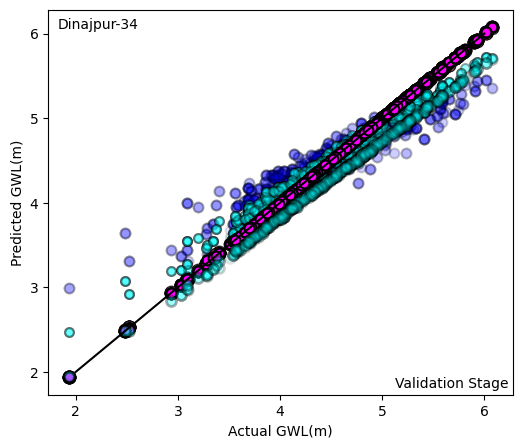

In [89]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_val,  hybrid7_pred_val, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_val, hybrid8_pred_val, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_val, hybrid9_pred_val, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_val, hybrid10_pred_val, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')


plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Scatter plot: Test Stage: Actual vs. Predicted GWL(m)

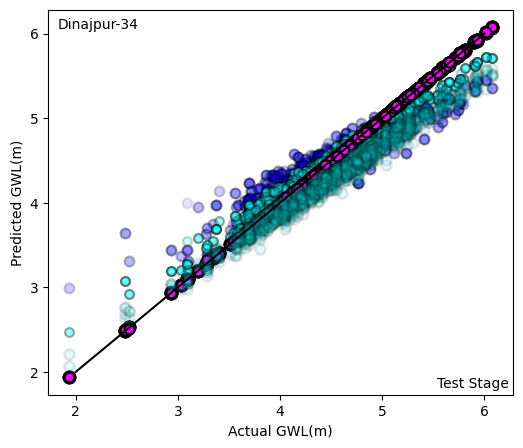

In [101]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_test,  hybrid7_pred_test, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_test, hybrid8_pred_test, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_test, hybrid9_pred_test, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_test, hybrid10_pred_test, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.99, 0.01, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(m)')
plt.ylabel('Predicted GWL(m)')
plt.grid(False)
plt.show()

## Validation Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

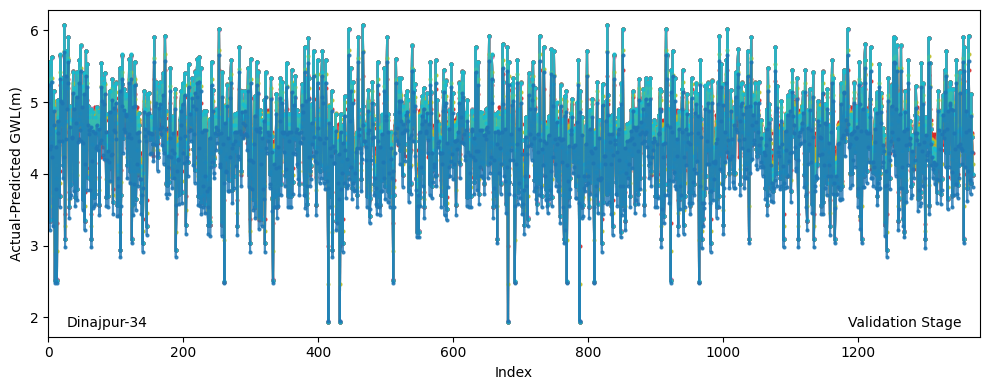

In [159]:
# Define the models and their corresponding predictions
models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val
}

# Create a DataFrame for the actual values (y_val)
actual_values = pd.DataFrame({'Actual Values': y_val.values})

plt.figure(figsize=(10, 4))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plot the predicted values for each model
for model_name, predictions in models_predictions_val.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Validation Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.xlim(0, 1380)
plt.tight_layout()
plt.show()

## Test Stage: Comparison of Actual vs. Predicted Groundwater Levels over index using Line Plot for Hybrid Models

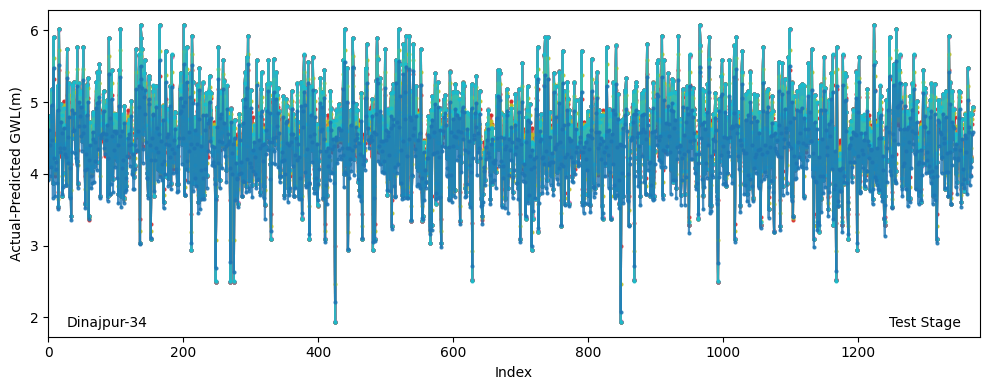

In [160]:
# Define the models and their corresponding predictions
models_predictions = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test,
    'Hybrid Model 7': hybrid7_pred_test,
    'Hybrid Model 8': hybrid8_pred_test,
    'Hybrid Model 9': hybrid9_pred_test,
    'Hybrid Model 10': hybrid10_pred_test
}

# Create a DataFrame for the actual values (y_test)
actual_values = pd.DataFrame({'Actual Values': y_test.values})

plt.figure(figsize=(10, 4))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=2)

# Plot the predicted values for each model
for model_name, predictions in models_predictions.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=2, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.02,"Dinajpur-34", transform=plt.gca().transAxes, va='bottom', ha='left', fontsize=10)
plt.text(0.98, 0.02, "Test Stage", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=10)
plt.grid(False)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.xlim(0, 1380)
plt.show()

# Distribution plot and Time series analysis
## Validation Satage

In [67]:
dates_val = df.loc[y_val.index, 'Date']

hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_val,
                    'Hybrid Model 2 Predictions': hybrid2_pred_val,
                    'Hybrid Model 3 Predictions': hybrid3_pred_val,
                    'Hybrid Model 4 Predictions': hybrid4_pred_val,
                    'Hybrid Model 5 Predictions': hybrid5_pred_val,
                    'Hybrid Model 6 Predictions': hybrid6_pred_val,
                    'Hybrid Model 7 Predictions': hybrid7_pred_val,
                    'Hybrid Model 8 Predictions': hybrid8_pred_val,
                    'Hybrid Model 9 Predictions': hybrid9_pred_val,
                    'Hybrid Model 10 Predictions': hybrid10_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
7609,5.2720,5.2720,5.265867,5.054271,5.268320,5.268047,5.251425,5.2720,5.144740,5.271066,4.982660,2013-11-01
4084,5.5625,5.5625,5.558763,5.111871,5.560258,5.560320,5.542339,5.5625,5.320430,5.562848,5.235553,2004-03-08
7920,3.3425,3.3425,3.342564,3.748955,3.342539,3.342603,3.341854,3.3425,3.545320,3.350265,3.215833,2014-09-08
8327,4.5500,4.5500,4.550478,4.784831,4.550287,4.550287,4.554771,4.5500,4.671210,4.549775,4.346859,2015-10-20
2716,4.6375,4.6375,4.634790,4.435559,4.635874,4.635822,4.626253,4.6375,4.526836,4.637837,4.383163,2000-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,4.1000,4.1000,4.100112,4.344731,4.100067,4.100130,4.105899,4.1000,4.226888,4.094158,3.920328,2008-10-11
3254,3.8750,3.8750,3.874998,4.227733,3.874999,3.875012,3.880404,3.8750,4.055429,3.876670,3.717360,2001-11-29
4541,5.1125,5.1125,5.109583,4.583489,5.110750,5.110673,5.097767,5.1125,4.835575,5.111758,4.801252,2005-06-08
350,4.5180,4.5180,4.517180,4.570248,4.517508,4.517486,4.518652,4.5180,4.544227,4.518276,4.297380,1993-12-17


In [68]:
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.294884,1993-01-09
1,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.294884,1993-01-15
2,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.294884,1993-01-18
3,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.294884,1993-01-20
4,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.294884,1993-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.380000,4.380000,4.380601,4.575680,4.380361,4.380302,4.388425,4.380000,4.484386,4.378638,4.182157,2017-11-10
1366,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.851256,2017-12-17
1367,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.851256,2017-12-21
1368,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.851256,2017-12-23


## Violin Plot: Distribution of predicted vs actual values groundwater level

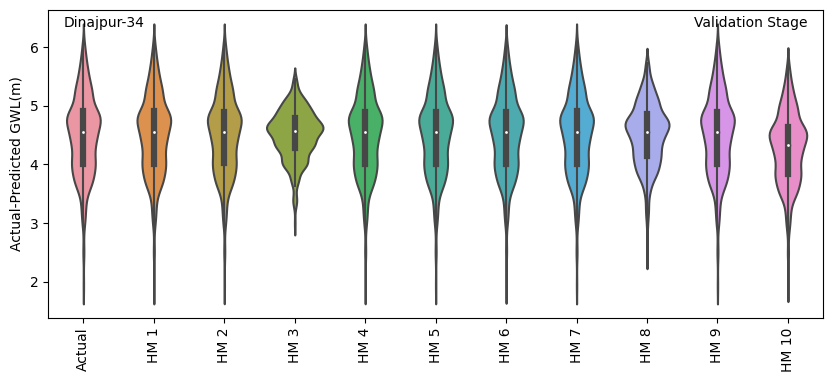

In [106]:
predictions_df = pd.DataFrame({
    'Actual': y_val.values,
    'HM 1': hybrid1_pred_val,
    'HM 2': hybrid2_pred_val,
    'HM 3': hybrid3_pred_val,
    'HM 4': hybrid4_pred_val,
    'HM 5': hybrid5_pred_val,
    'HM 6': hybrid6_pred_val,
    'HM 7': hybrid7_pred_val,
    'HM 8': hybrid8_pred_val,
    'HM 9': hybrid9_pred_val,
    'HM 10': hybrid10_pred_val,
})

plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Validation Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)

plt.ylabel('Actual-Predicted GWL(m)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [70]:
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 1 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 2 Predictions,4.516263,4.516263,4.516263,4.516263,4.516263,4.373802,4.373802,4.373802,4.373802,4.373802,...,4.820049,4.820049,4.820049,4.380601,4.380601,4.380601,5.13098,5.13098,5.13098,5.13098
Hybrid Model 3 Predictions,4.559429,4.559429,4.559429,4.559429,4.559429,4.523442,4.523442,4.523442,4.523442,4.523442,...,4.885162,4.885162,4.885162,4.57568,4.57568,4.57568,4.900215,4.900215,4.900215,4.900215
Hybrid Model 4 Predictions,4.516958,4.516958,4.516958,4.516958,4.516958,4.373614,4.373614,4.373614,4.373614,4.373614,...,4.82003,4.82003,4.82003,4.380361,4.380361,4.380361,5.131921,5.131921,5.131921,5.131921
Hybrid Model 5 Predictions,4.516841,4.516841,4.516841,4.516841,4.516841,4.37359,4.37359,4.37359,4.37359,4.37359,...,4.82002,4.82002,4.82002,4.380302,4.380302,4.380302,5.131842,5.131842,5.131842,5.131842
Hybrid Model 6 Predictions,4.51077,4.51077,4.51077,4.51077,4.51077,4.373884,4.373884,4.373884,4.373884,4.373884,...,4.817389,4.817389,4.817389,4.388425,4.388425,4.388425,5.122112,5.122112,5.122112,5.122112
Hybrid Model 7 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.82,4.82,4.82,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 8 Predictions,4.532423,4.532423,4.532423,4.532423,4.532423,4.448993,4.448993,4.448993,4.448993,4.448993,...,4.850638,4.850638,4.850638,4.484386,4.484386,4.484386,5.00724,5.00724,5.00724,5.00724
Hybrid Model 9 Predictions,4.518517,4.518517,4.518517,4.518517,4.518517,4.378147,4.378147,4.378147,4.378147,4.378147,...,4.819942,4.819942,4.819942,4.378638,4.378638,4.378638,5.133906,5.133906,5.133906,5.133906


# Time series plots: predicted vs actual values groundwater level

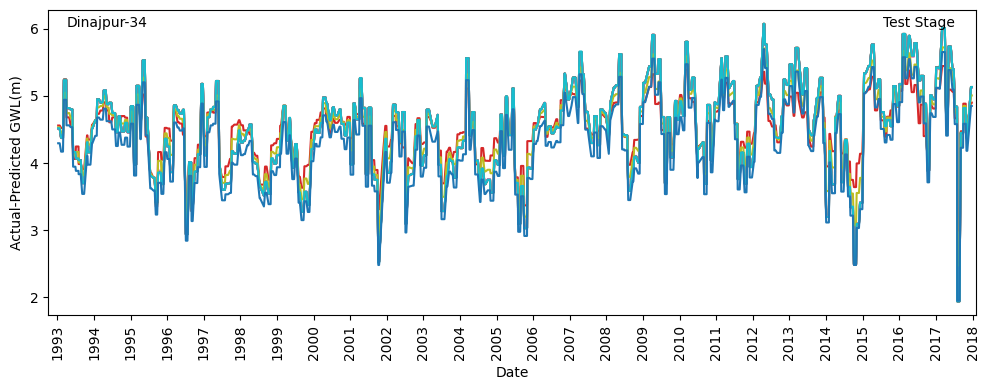

In [131]:
# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)


plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

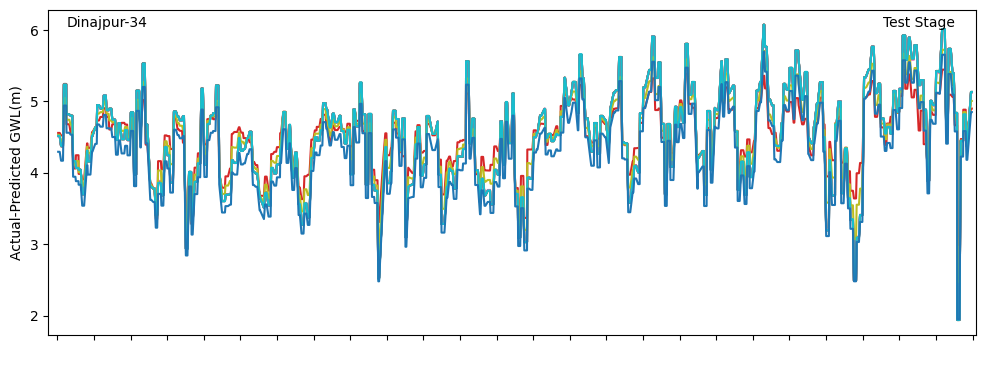

In [132]:
# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)


plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90, color='white') 
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

# Distribution plot and Time series analysis
## Test stage

In [73]:
dates_test = df.loc[y_test.index, 'Date']

hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_test,
                    'Hybrid Model 2 Predictions': hybrid2_pred_test,
                    'Hybrid Model 3 Predictions': hybrid3_pred_test,
                    'Hybrid Model 4 Predictions': hybrid4_pred_test,
                    'Hybrid Model 5 Predictions': hybrid5_pred_test,
                    'Hybrid Model 6 Predictions': hybrid6_pred_test,
                    'Hybrid Model 7 Predictions': hybrid7_pred_test,
                    'Hybrid Model 8 Predictions': hybrid8_pred_test,
                    'Hybrid Model 9 Predictions': hybrid9_pred_test,
                    'Hybrid Model 10 Predictions': hybrid10_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
4710,3.934000,3.934000,3.938010,4.326354,3.936406,3.936487,3.940005,3.934000,4.136546,3.934552,3.911643,2005-11-24
131,4.800000,4.800000,4.800285,4.557315,4.800171,4.800343,4.793364,4.800000,4.673937,4.799919,4.610903,1993-05-12
2802,4.800000,4.800000,4.796862,4.645555,4.798117,4.798050,4.792276,4.800000,4.715522,4.799919,4.397330,2000-09-03
4472,4.110000,4.110000,4.111202,4.291846,4.110721,4.110681,4.117536,4.110000,4.207086,4.113268,3.968056,2005-03-31
1108,4.248333,4.248333,4.247535,4.514911,4.247854,4.247868,4.239768,4.248333,4.374849,4.247617,4.099847,1996-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
2948,3.984000,3.984000,3.985996,4.370990,3.985198,3.985006,4.000840,3.984000,4.190879,3.975450,3.838082,2001-01-27
6394,4.213333,4.213333,4.213286,4.248840,4.213305,4.213284,4.216714,4.213333,4.233585,4.212621,3.972920,2010-07-05
1746,4.178333,4.178333,4.177957,4.543832,4.178108,4.178127,4.180003,4.178333,4.362180,4.179257,4.099611,1997-10-13
5820,4.837500,4.837500,4.836884,4.700542,4.837130,4.837078,4.837795,4.837500,4.768926,4.837236,4.549963,2008-12-08


In [74]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.325084,1993-01-01
1,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.146084,1993-01-04
2,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.293334,1993-01-13
3,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.321884,1993-01-27
4,4.518000,4.518000,4.516263,4.559429,4.516958,4.516841,4.510770,4.518000,4.532423,4.518517,4.262084,1993-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,4.380000,4.380000,4.380601,4.575680,4.380361,4.380302,4.388425,4.380000,4.484386,4.378638,4.161990,2017-11-30
1366,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.827922,2017-12-07
1367,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.760172,2017-12-10
1368,5.133333,5.133333,5.130980,4.900215,5.131921,5.131842,5.122112,5.133333,5.007240,5.133906,4.647722,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values

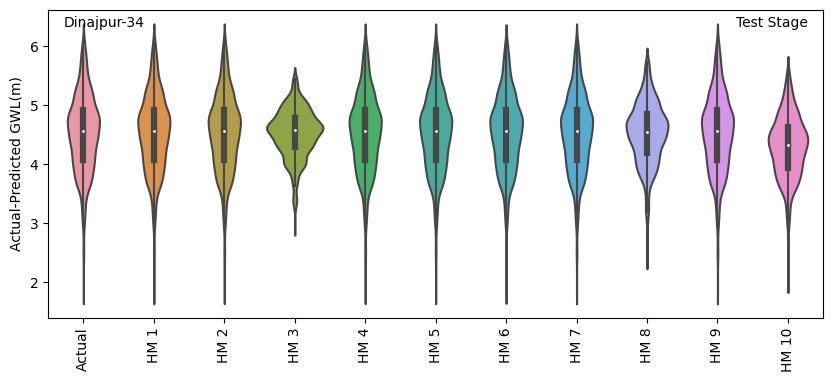

In [109]:
# Combine the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'HM 1': hybrid1_pred_test,
    'HM 2': hybrid2_pred_test,
    'HM 3': hybrid3_pred_test,
    'HM 4': hybrid4_pred_test,
    'HM 5': hybrid5_pred_test,
    'HM 6': hybrid6_pred_test,
    'HM 7': hybrid7_pred_test,
    'HM 8': hybrid8_pred_test,
    'HM 9': hybrid9_pred_test,
    'HM 10': hybrid10_pred_test,
})

# Create a violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)

plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.98, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='right', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [76]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 1 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 2 Predictions,4.516263,4.516263,4.516263,4.516263,4.516263,4.373802,4.373802,4.373802,4.373802,4.373802,...,4.380601,4.380601,4.380601,4.380601,4.380601,4.380601,5.13098,5.13098,5.13098,5.13098
Hybrid Model 3 Predictions,4.559429,4.559429,4.559429,4.559429,4.559429,4.523442,4.523442,4.523442,4.523442,4.523442,...,4.57568,4.57568,4.57568,4.57568,4.57568,4.57568,4.900215,4.900215,4.900215,4.900215
Hybrid Model 4 Predictions,4.516958,4.516958,4.516958,4.516958,4.516958,4.373614,4.373614,4.373614,4.373614,4.373614,...,4.380361,4.380361,4.380361,4.380361,4.380361,4.380361,5.131921,5.131921,5.131921,5.131921
Hybrid Model 5 Predictions,4.516841,4.516841,4.516841,4.516841,4.516841,4.37359,4.37359,4.37359,4.37359,4.37359,...,4.380302,4.380302,4.380302,4.380302,4.380302,4.380302,5.131842,5.131842,5.131842,5.131842
Hybrid Model 6 Predictions,4.51077,4.51077,4.51077,4.51077,4.51077,4.373884,4.373884,4.373884,4.373884,4.373884,...,4.388425,4.388425,4.388425,4.388425,4.388425,4.388425,5.122112,5.122112,5.122112,5.122112
Hybrid Model 7 Predictions,4.518,4.518,4.518,4.518,4.518,4.373333,4.373333,4.373333,4.373333,4.373333,...,4.38,4.38,4.38,4.38,4.38,4.38,5.133333,5.133333,5.133333,5.133333
Hybrid Model 8 Predictions,4.532423,4.532423,4.532423,4.532423,4.532423,4.448993,4.448993,4.448993,4.448993,4.448993,...,4.484386,4.484386,4.484386,4.484386,4.484386,4.484386,5.00724,5.00724,5.00724,5.00724
Hybrid Model 9 Predictions,4.518517,4.518517,4.518517,4.518517,4.518517,4.378147,4.378147,4.378147,4.378147,4.378147,...,4.378638,4.378638,4.378638,4.378638,4.378638,4.378638,5.133906,5.133906,5.133906,5.133906


# Time series plots: Test stage

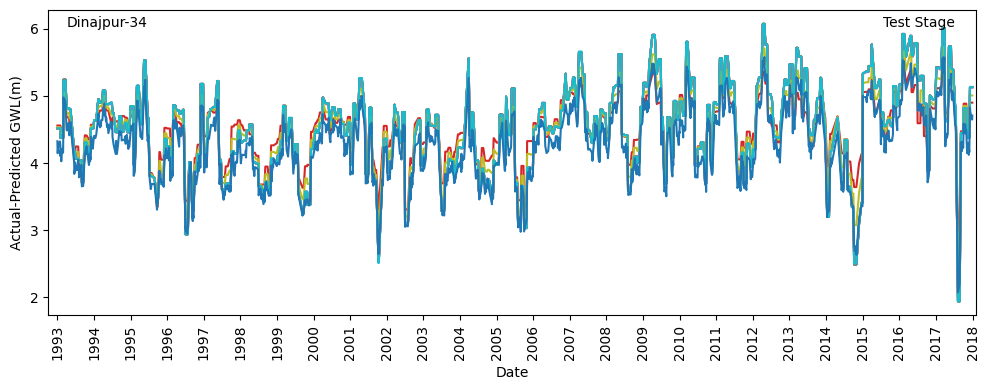

In [158]:
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_test_df.columns[:-1]:
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.90, 0.98, "Test Stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()

# Density Plot: Validation stage

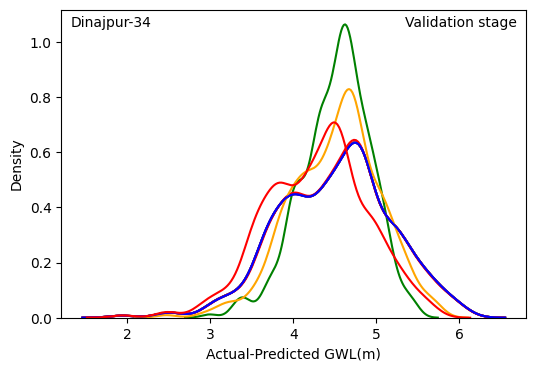

In [153]:
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(y_val.values, color='red', label='Hybrid Model 1')
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='green', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='purple', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_val, color='purple', label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_val, color='orange', label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_val, color='blue', label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_val, color='red', label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Validation stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

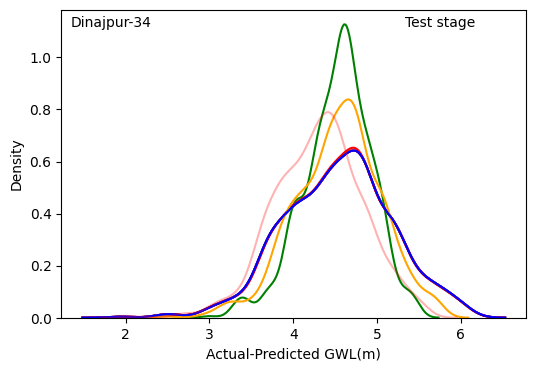

In [152]:
plt.figure(figsize=(6, 4))

# Define a list of colors for the density plots
colors = ['green', 'blue', 'green', 'purple', 'orange', 'red', 'purple', 'orange', 'blue', "red"]

# Plotting density plots for each hybrid model with different colors
sns.kdeplot(y_test.values, color=colors[-2], label='Actual')
sns.kdeplot(hybrid1_pred_test, color=colors[5], label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color=colors[1], alpha=0.3, label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color=colors[2], label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color=colors[3], label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color=colors[4], label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color=colors[5], label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_test, color=colors[6], label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_test, color=colors[7],label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_test, color=colors[8], label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_test, color=colors[9], alpha=0.3,label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98,"Dinajpur-34", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.text(0.74, 0.98, "Test stage", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()